# Training on VM

In [1]:
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

print("GPU available:", torch.cuda.is_available())
print("Number of GPUs: ", torch.cuda.device_count())

GPU available: True
Number of GPUs:  1


In [2]:
os.getcwd()

'/users/eleves-b/2024/mattia.martino'

In [3]:
model = YOLO('yolo11n.pt')

In [5]:
def delete_images_without_labels(dataset_path, image_extensions=('jpg', 'png'), label_extension='txt'):
    """
    Deletes all images that do not have a corresponding label in the YOLO dataset.

    Parameters:
        dataset_path (str): Path to the dataset folder containing 'images' and 'labels' directories.
        image_extensions (tuple): Allowed image file extensions.
        label_extension (str): Extension of label files.

    Returns:
        list: A list of deleted image file paths.
    """
    images_path = os.path.join(dataset_path, "images")
    labels_path = os.path.join(dataset_path, "labels")

    image_files = {os.path.splitext(f)[0]: os.path.join(images_path, f)
                   for f in os.listdir(images_path) if f.split('.')[-1].lower() in image_extensions}
    label_files = {os.path.splitext(f)[0]: os.path.join(labels_path, f)
                   for f in os.listdir(labels_path) if f.endswith(label_extension)}

    deleted_images = []

    for img_name, img_path in image_files.items():
        if img_name not in label_files:
            try:
                os.remove(img_path)
                deleted_images.append(img_path)
            except Exception as e:
                print(f"Failed to delete {img_path}: {e}")

    return deleted_images


# Example usage
dataset_path = "synthetic_dataset_v2/train"  # Replace with your dataset path
deleted_files = delete_images_without_labels(dataset_path)

# Print the results
print(f"Deleted {len(deleted_files)} images:")
for file in deleted_files:
    print(f" - {file}")

Deleted 0 images:


In [4]:
results = model.train(
    data='synthetic_dataset_v3/data_lr.yaml',
    epochs=20,
    imgsz=640,
    batch=8,
    workers=8,
    device=0
)

New https://pypi.org/project/ultralytics/8.3.49 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.12.2 torch-2.5.1 CUDA:0 (NVIDIA RTX A4000, 16080MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=synthetic_dataset_v3/data_lr.yaml, epochs=20, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fra

train: Scanning /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/train/labels... 9477 images, 0 backgrounds, 379 corrupt: 100%|██████████| 9477/9477 [00:11<00:00, 823.04it/s] 

train: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/train/images/image_00040.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0162      1.0821]
train: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/train/images/image_00072.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0239]
train: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/train/images/image_00079.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1233      1.0381]
train: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/train/images/image_00094.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0123]
train: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/train/images/image_00115.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0098]
train: WARN

train: New cache created: /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/train/labels.cache


val: Scanning /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/val/labels... 1569 images, 0 backgrounds, 68 corrupt: 100%|██████████| 1569/1569 [00:01<00:00, 911.26it/s] 

val: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/val/images/image_00043.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0911      1.1581]
val: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/val/images/image_00076.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0273      1.0118]
val: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/val/images/image_00108.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0957      1.0698]
val: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/val/images/image_00121.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1365      1.1635]
val: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/val/images/image_00129.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0116]
val: WA

Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      1.62G      1.648      3.695      1.202         35        640: 100%|██████████| 1138/1138 [01:02<00:00, 18.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 20.58it/s]


                   all       1501      17118     0.0456       0.56     0.0534     0.0402

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      1.54G      1.245      2.215      1.023         17        640: 100%|██████████| 1138/1138 [00:59<00:00, 19.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 18.99it/s]


                   all       1501      17118     0.0811      0.287     0.0804     0.0607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       1.5G      1.107      1.904     0.9846         33        640: 100%|██████████| 1138/1138 [00:59<00:00, 19.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 19.44it/s]


                   all       1501      17118      0.134      0.373      0.133      0.099

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20       1.6G      1.039      1.705     0.9662         65        640: 100%|██████████| 1138/1138 [00:58<00:00, 19.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 19.88it/s]


                   all       1501      17118      0.167      0.484      0.174       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      1.55G     0.9897      1.578      0.951         16        640: 100%|██████████| 1138/1138 [00:58<00:00, 19.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 20.37it/s]


                   all       1501      17118      0.197      0.515      0.214      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      1.56G     0.9529      1.487     0.9388         40        640: 100%|██████████| 1138/1138 [00:58<00:00, 19.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 20.57it/s]


                   all       1501      17118      0.242      0.529      0.269      0.206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      1.55G     0.9273      1.404     0.9339         37        640: 100%|██████████| 1138/1138 [00:59<00:00, 19.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 20.47it/s]


                   all       1501      17118      0.303      0.535      0.338      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      1.56G     0.8979      1.318     0.9261         20        640: 100%|██████████| 1138/1138 [00:59<00:00, 19.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 20.49it/s]


                   all       1501      17118      0.377      0.556      0.422      0.329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      1.55G      0.882      1.242     0.9211         46        640: 100%|██████████| 1138/1138 [00:59<00:00, 19.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.05it/s]


                   all       1501      17118      0.433      0.595      0.494      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      1.59G     0.8629      1.171     0.9163         38        640: 100%|██████████| 1138/1138 [00:58<00:00, 19.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.21it/s]


                   all       1501      17118      0.503      0.611      0.565      0.446
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      1.42G     0.7767      1.118     0.8893         15        640: 100%|██████████| 1138/1138 [00:57<00:00, 19.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.90it/s]


                   all       1501      17118      0.545      0.646      0.614      0.483

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      1.37G     0.7532      1.043     0.8823         24        640: 100%|██████████| 1138/1138 [00:56<00:00, 20.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.45it/s]


                   all       1501      17118      0.618      0.668       0.68      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      1.37G      0.732     0.9895     0.8764         26        640: 100%|██████████| 1138/1138 [00:57<00:00, 19.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.52it/s]


                   all       1501      17118      0.648      0.692       0.71      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      1.38G     0.7209     0.9445     0.8715         19        640: 100%|██████████| 1138/1138 [00:57<00:00, 19.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.58it/s]


                   all       1501      17118      0.691      0.708      0.747      0.603

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      1.37G      0.704     0.9076     0.8682         23        640: 100%|██████████| 1138/1138 [00:57<00:00, 19.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.62it/s]


                   all       1501      17118      0.721      0.721      0.775       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      1.38G     0.6958     0.8757     0.8662         17        640: 100%|██████████| 1138/1138 [00:57<00:00, 19.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.63it/s]

                   all       1501      17118      0.751      0.729      0.796      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      1.36G     0.6822     0.8492     0.8617         22        640: 100%|██████████| 1138/1138 [00:57<00:00, 19.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.61it/s]


                   all       1501      17118      0.773      0.746      0.813      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      1.37G     0.6712     0.8255     0.8589         15        640: 100%|██████████| 1138/1138 [00:57<00:00, 19.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.62it/s]


                   all       1501      17118      0.784      0.751      0.825      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      1.36G     0.6653     0.8111     0.8579         23        640: 100%|██████████| 1138/1138 [00:57<00:00, 19.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.72it/s]


                   all       1501      17118      0.794      0.756      0.834      0.677

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      1.37G     0.6534     0.7957     0.8532         24        640: 100%|██████████| 1138/1138 [00:57<00:00, 19.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.70it/s]


                   all       1501      17118        0.8      0.761      0.839      0.684

20 epochs completed in 0.353 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.12.2 torch-2.5.1 CUDA:0 (NVIDIA RTX A4000, 16080MiB)
YOLO11n summary (fused): 238 layers, 2,592,682 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 20.44it/s]


                   all       1501      17118      0.799      0.762      0.839      0.684
                    2C        151        260      0.859      0.854      0.903      0.735
                    2D        194        336      0.932      0.866      0.943      0.774
                    2H        176        294      0.867      0.912      0.944      0.773
                    2S        152        263      0.911      0.825      0.904      0.748
                    3C        172        292      0.914      0.872      0.942      0.775
                    3D        152        270      0.905      0.878       0.94      0.772
                    3H        160        275       0.94      0.829      0.931      0.736
                    3S        172        293      0.817      0.846        0.9      0.741
                    4C        154        257      0.919      0.842      0.913      0.738
                    4D        150        245      0.877      0.876      0.924      0.759
                    4

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

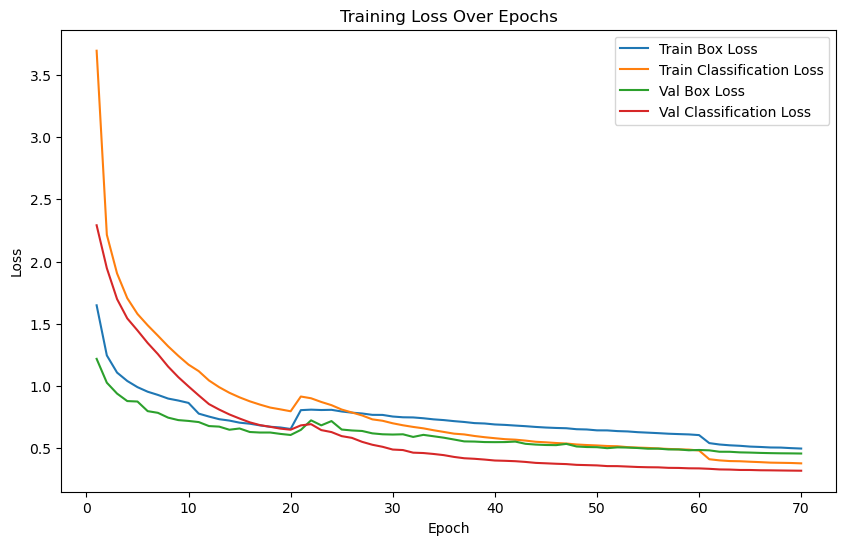

In [10]:
results_path = "runs_lr/detect/train/results.csv"  # Update with your path
results1 = pd.read_csv(results_path)
results2 = pd.read_csv("runs_lr/detect/train7/results.csv")
results2['epoch'] = range(21, 71)
results = pd.concat([results1, results2])
# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(results["epoch"], results["train/box_loss"], label="Train Box Loss")
plt.plot(results["epoch"], results["train/cls_loss"], label="Train Classification Loss")
plt.plot(results["epoch"], results['val/box_loss'], label="Val Box Loss")
plt.plot(results["epoch"], results['val/cls_loss'], label="Val Classification Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.show()

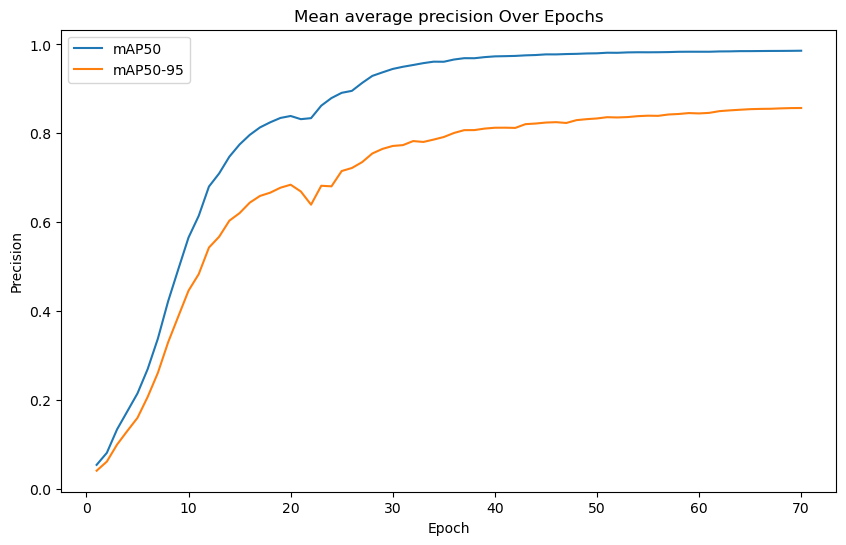

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(results["epoch"], results["metrics/mAP50(B)"], label="mAP50")
plt.plot(results["epoch"], results["metrics/mAP50-95(B)"], label="mAP50-95")
plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.title("Mean average precision Over Epochs")
plt.legend()
plt.show()

In [10]:
metrics = model.val(data="synthetic_dataset_v3/data_lr.yaml", split="test")

Ultralytics 8.3.40 🚀 Python-3.12.2 torch-2.5.1 CUDA:0 (NVIDIA RTX A4000, 16080MiB)


val: Scanning /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/test/labels... 1590 images, 0 backgrounds, 65 corrupt: 100%|██████████| 1590/1590 [00:03<00:00, 502.77it/s]

val: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/test/images/image_00060.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0032      1.0287]
val: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/test/images/image_00080.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0102]
val: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/test/images/image_00145.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0954      1.1782]
val: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/test/images/image_00147.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0021]
val: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/test/images/image_00154.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0363]
val: WARNING ⚠️ /users/ele


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 191/191 [00:06<00:00, 30.87it/s]


                   all       1525      17217       0.79      0.762      0.835      0.683
                    2C        153        263      0.869      0.858      0.928      0.763
                    2D        163        281      0.904      0.871      0.941      0.769
                    2H        162        272      0.906      0.857      0.928      0.761
                    2S        148        250      0.909      0.843      0.915      0.765
                    3C        164        282      0.863      0.872      0.933      0.757
                    3D        148        246      0.875      0.852      0.924       0.75
                    3H        154        269      0.917      0.818      0.925      0.745
                    3S        165        284      0.828      0.831      0.876      0.728
                    4C        185        316      0.954      0.848      0.958      0.785
                    4D        155        262      0.877      0.901       0.94       0.78
                    4

In [15]:
print(metrics)

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fea9d52fdd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.03

In [13]:
check = YOLO("runs/detect/train/weights/best.pt")

# Predict on a custom image
results = model.predict(source="./custom_images", save=True)

# Print results
print(results)


image 1/4 /users/eleves-b/2024/mattia.martino/custom_images/IMG_0030.jpeg: 480x640 3 2Ds, 4 JCs, 1 flop, 3.2ms
image 2/4 /users/eleves-b/2024/mattia.martino/custom_images/IMG_0067.jpeg: 640x480 1 TD, 1 TH, 3.1ms
image 3/4 /users/eleves-b/2024/mattia.martino/custom_images/IMG_4595.jpeg: 640x480 1 3C, 1 3D, 1 4C, 1 5D, 1 6D, 1 QD, 3 QHs, 1 flop, 2.8ms
image 4/4 /users/eleves-b/2024/mattia.martino/custom_images/average-hand-of-online-poker-v0-vt94cjwjwbkd1.png.webp: 352x640 1 AC, 1 TD, 2 flops, 4.5ms
Speed: 3.8ms preprocess, 3.4ms inference, 0.5ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/train6
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: '2C', 1: '2D', 2: '2H', 3: '2S', 4: '3C', 5: '3D', 6: '3H', 7: '3S', 8: '4C', 9: '4D', 10: '4H', 11: '4S', 12: '5C', 13: '5D', 14: '5H', 15: '5S', 16: '6C', 17: '6D', 18: '6H', 19: '6S', 20: '7C', 21: '7D', 22: '7H', 

Continue training to reach 50 epochs

In [14]:
model = YOLO("runs/detect/train/weights/best.pt")

results = model.train(
    data='synthetic_dataset_v3/data_lr.yaml',
    epochs=50,
    imgsz=640,
    batch=8,
    workers=8,
    device=0
)

New https://pypi.org/project/ultralytics/8.3.49 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.12.2 torch-2.5.1 CUDA:0 (NVIDIA RTX A4000, 16080MiB)
engine/trainer: task=detect, mode=train, model=runs/detect/train/weights/best.pt, data=synthetic_dataset_v3/data_lr.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=No

train: Scanning /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/train/labels.cache... 9477 images, 0 backgrounds, 379 corrupt: 100%|██████████| 9477/9477 [00:00<?, ?it/s]

train: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/train/images/image_00040.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0162      1.0821]
train: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/train/images/image_00072.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0239]
train: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/train/images/image_00079.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1233      1.0381]
train: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/train/images/image_00094.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0123]
train: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/train/images/image_00115.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0098]
train: WARN


val: Scanning /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/val/labels.cache... 1569 images, 0 backgrounds, 68 corrupt: 100%|██████████| 1569/1569 [00:00<?, ?it/s]

val: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/val/images/image_00043.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0911      1.1581]
val: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/val/images/image_00076.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0273      1.0118]
val: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/val/images/image_00108.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0957      1.0698]
val: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/val/images/image_00121.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1365      1.1635]
val: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/val/images/image_00129.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0116]
val: WA

Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train7
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.51G     0.8047     0.9143     0.8978         35        640: 100%|██████████| 1138/1138 [01:03<00:00, 17.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.65it/s]


                   all       1501      17118      0.783      0.758      0.832      0.669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.55G     0.8088     0.9003     0.9001         17        640: 100%|██████████| 1138/1138 [01:00<00:00, 18.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.64it/s]


                   all       1501      17118      0.775      0.768      0.834      0.639

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.51G     0.8058     0.8706     0.8985         33        640: 100%|██████████| 1138/1138 [00:59<00:00, 19.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.65it/s]


                   all       1501      17118      0.825      0.778      0.862      0.682

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.62G     0.8074     0.8449     0.8988         65        640: 100%|██████████| 1138/1138 [00:59<00:00, 19.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.57it/s]


                   all       1501      17118      0.828      0.803      0.879       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.56G      0.794     0.8097     0.8954         16        640: 100%|██████████| 1138/1138 [00:58<00:00, 19.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.69it/s]


                   all       1501      17118      0.848      0.815      0.891      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.55G     0.7846     0.7859     0.8913         40        640: 100%|██████████| 1138/1138 [00:58<00:00, 19.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.71it/s]


                   all       1501      17118      0.847       0.82      0.895      0.722

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.56G      0.778     0.7621     0.8904         37        640: 100%|██████████| 1138/1138 [00:59<00:00, 19.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.80it/s]


                   all       1501      17118       0.87      0.841      0.913      0.735

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.55G     0.7669     0.7308     0.8881         20        640: 100%|██████████| 1138/1138 [00:59<00:00, 19.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.82it/s]

                   all       1501      17118      0.884      0.852      0.929      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.54G     0.7664     0.7194     0.8866         46        640: 100%|██████████| 1138/1138 [00:59<00:00, 19.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.79it/s]


                   all       1501      17118      0.892      0.863      0.937      0.765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.58G     0.7535     0.6991     0.8843         38        640: 100%|██████████| 1138/1138 [00:57<00:00, 19.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 22.44it/s]


                   all       1501      17118      0.905      0.881      0.945      0.771

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       1.5G     0.7474     0.6831     0.8827         42        640: 100%|██████████| 1138/1138 [00:57<00:00, 19.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.84it/s]


                   all       1501      17118      0.909      0.883       0.95      0.773

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.57G     0.7462     0.6698     0.8826         35        640: 100%|██████████| 1138/1138 [00:58<00:00, 19.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.83it/s]


                   all       1501      17118      0.912      0.894      0.954      0.782

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.56G     0.7396     0.6585     0.8798         28        640: 100%|██████████| 1138/1138 [00:59<00:00, 19.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.83it/s]


                   all       1501      17118      0.915      0.902      0.958       0.78

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.57G     0.7307     0.6432      0.878         18        640: 100%|██████████| 1138/1138 [00:58<00:00, 19.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.87it/s]


                   all       1501      17118       0.92      0.901      0.961      0.786

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.56G     0.7248     0.6296     0.8767         22        640: 100%|██████████| 1138/1138 [00:59<00:00, 19.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.90it/s]


                   all       1501      17118      0.916       0.91      0.961      0.792

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.48G     0.7164     0.6157     0.8754         25        640: 100%|██████████| 1138/1138 [00:58<00:00, 19.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.90it/s]


                   all       1501      17118      0.929      0.912      0.966      0.801

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.55G     0.7096     0.6095     0.8725         32        640: 100%|██████████| 1138/1138 [00:58<00:00, 19.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.86it/s]


                   all       1501      17118      0.932       0.92      0.969      0.807

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50       1.5G     0.7006      0.597     0.8715         21        640: 100%|██████████| 1138/1138 [00:58<00:00, 19.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.88it/s]


                   all       1501      17118       0.93      0.922      0.969      0.807

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.55G     0.6975     0.5872     0.8707         30        640: 100%|██████████| 1138/1138 [00:59<00:00, 19.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.91it/s]


                   all       1501      17118      0.931      0.929      0.971      0.811

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.55G     0.6897     0.5791     0.8687         23        640: 100%|██████████| 1138/1138 [00:59<00:00, 19.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 22.57it/s]


                   all       1501      17118      0.937       0.93      0.973      0.812

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.62G     0.6861     0.5714     0.8689         48        640: 100%|██████████| 1138/1138 [00:57<00:00, 19.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.95it/s]


                   all       1501      17118      0.937      0.933      0.974      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.55G     0.6808     0.5674      0.866         18        640: 100%|██████████| 1138/1138 [00:57<00:00, 19.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 22.57it/s]


                   all       1501      17118      0.935      0.936      0.974      0.812

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.62G     0.6758     0.5599     0.8642         18        640: 100%|██████████| 1138/1138 [00:57<00:00, 19.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.95it/s]


                   all       1501      17118      0.939      0.937      0.975       0.82

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.48G     0.6697     0.5505     0.8636         46        640: 100%|██████████| 1138/1138 [00:58<00:00, 19.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.93it/s]


                   all       1501      17118      0.939      0.942      0.976      0.822

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.61G     0.6649      0.546     0.8625         16        640: 100%|██████████| 1138/1138 [00:58<00:00, 19.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.97it/s]


                   all       1501      17118      0.942      0.945      0.978      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.55G     0.6615     0.5405     0.8608         51        640: 100%|██████████| 1138/1138 [00:58<00:00, 19.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.92it/s]


                   all       1501      17118      0.944      0.941      0.978      0.825

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.51G     0.6593     0.5364     0.8615         37        640: 100%|██████████| 1138/1138 [00:57<00:00, 19.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.98it/s]


                   all       1501      17118      0.941      0.947      0.978      0.823

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.51G     0.6515     0.5287     0.8588         34        640: 100%|██████████| 1138/1138 [00:58<00:00, 19.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 22.53it/s]


                   all       1501      17118      0.947      0.945      0.979       0.83

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.56G     0.6493     0.5243     0.8594         19        640: 100%|██████████| 1138/1138 [00:57<00:00, 19.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 22.49it/s]

                   all       1501      17118      0.943       0.95       0.98      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.57G     0.6423     0.5208     0.8579         22        640: 100%|██████████| 1138/1138 [00:58<00:00, 19.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 22.56it/s]


                   all       1501      17118      0.947       0.95       0.98      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.51G     0.6419     0.5165     0.8572         24        640: 100%|██████████| 1138/1138 [00:58<00:00, 19.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.93it/s]


                   all       1501      17118       0.95       0.95      0.981      0.836

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.55G     0.6363     0.5145     0.8564         33        640: 100%|██████████| 1138/1138 [00:58<00:00, 19.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 22.57it/s]


                   all       1501      17118      0.946       0.95      0.981      0.836

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.58G     0.6336     0.5072     0.8557         45        640: 100%|██████████| 1138/1138 [00:58<00:00, 19.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 22.00it/s]


                   all       1501      17118       0.95      0.953      0.982      0.836

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.48G     0.6276     0.5038     0.8559         21        640: 100%|██████████| 1138/1138 [00:58<00:00, 19.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.93it/s]


                   all       1501      17118       0.95      0.957      0.982      0.839

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.49G     0.6237     0.5009     0.8538         55        640: 100%|██████████| 1138/1138 [00:59<00:00, 19.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.96it/s]


                   all       1501      17118      0.949      0.957      0.982       0.84

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.53G     0.6198     0.4967     0.8522         37        640: 100%|██████████| 1138/1138 [00:59<00:00, 19.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.96it/s]


                   all       1501      17118      0.949      0.956      0.982      0.839

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.56G     0.6152     0.4929     0.8533         47        640: 100%|██████████| 1138/1138 [00:58<00:00, 19.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.98it/s]


                   all       1501      17118      0.948      0.957      0.983      0.842

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.57G     0.6123     0.4898     0.8519         35        640: 100%|██████████| 1138/1138 [00:58<00:00, 19.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.98it/s]


                   all       1501      17118      0.952      0.958      0.983      0.843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.55G     0.6096     0.4874     0.8515         45        640: 100%|██████████| 1138/1138 [00:58<00:00, 19.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.99it/s]


                   all       1501      17118      0.954      0.955      0.984      0.845

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.63G     0.6041     0.4803     0.8489         40        640: 100%|██████████| 1138/1138 [00:58<00:00, 19.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 22.01it/s]


                   all       1501      17118      0.951      0.957      0.984      0.845
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.41G     0.5397     0.4101      0.827         22        640: 100%|██████████| 1138/1138 [00:57<00:00, 19.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 22.00it/s]

                   all       1501      17118      0.951      0.958      0.984      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.37G     0.5286     0.4009     0.8249         17        640: 100%|██████████| 1138/1138 [00:57<00:00, 19.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.94it/s]


                   all       1501      17118      0.954       0.96      0.984       0.85

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.38G     0.5221     0.3954     0.8228         17        640: 100%|██████████| 1138/1138 [00:57<00:00, 19.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 22.00it/s]


                   all       1501      17118      0.951      0.962      0.984      0.852

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.38G     0.5181     0.3939     0.8229         13        640: 100%|██████████| 1138/1138 [00:57<00:00, 19.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.97it/s]


                   all       1501      17118      0.955      0.961      0.985      0.853

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.38G     0.5117       0.39     0.8211         23        640: 100%|██████████| 1138/1138 [00:57<00:00, 19.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 22.00it/s]


                   all       1501      17118      0.954      0.961      0.985      0.854

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.38G     0.5087     0.3867     0.8213         21        640: 100%|██████████| 1138/1138 [00:57<00:00, 19.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.95it/s]


                   all       1501      17118      0.957      0.959      0.985      0.855

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.38G     0.5046     0.3827     0.8191         26        640: 100%|██████████| 1138/1138 [00:57<00:00, 19.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 22.04it/s]


                   all       1501      17118      0.957       0.96      0.985      0.855

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.38G     0.5038     0.3813      0.819         24        640: 100%|██████████| 1138/1138 [00:57<00:00, 19.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 22.01it/s]


                   all       1501      17118      0.954      0.963      0.985      0.856

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.38G     0.4994     0.3798     0.8182         15        640: 100%|██████████| 1138/1138 [00:57<00:00, 19.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.99it/s]


                   all       1501      17118      0.955      0.963      0.986      0.857

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.38G     0.4959     0.3769     0.8182         23        640: 100%|██████████| 1138/1138 [00:57<00:00, 19.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 21.96it/s]


                   all       1501      17118      0.955      0.964      0.986      0.857

50 epochs completed in 0.881 hours.
Optimizer stripped from runs/detect/train7/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train7/weights/best.pt, 5.5MB

Validating runs/detect/train7/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.12.2 torch-2.5.1 CUDA:0 (NVIDIA RTX A4000, 16080MiB)
YOLO11n summary (fused): 238 layers, 2,592,682 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 94/94 [00:04<00:00, 20.93it/s]


                   all       1501      17118      0.956      0.964      0.986      0.857
                    2C        151        260      0.954      0.964      0.983      0.842
                    2D        194        336       0.97       0.97      0.992      0.871
                    2H        176        294      0.938      0.986      0.988      0.866
                    2S        152        263      0.962      0.963      0.988      0.856
                    3C        172        292      0.972      0.949      0.986      0.861
                    3D        152        270       0.97       0.97      0.989      0.863
                    3H        160        275      0.969      0.975       0.99      0.859
                    3S        172        293      0.941      0.976      0.991       0.87
                    4C        154        257      0.937      0.969      0.986      0.858
                    4D        150        245      0.976      0.976      0.989      0.857
                    4

In [15]:
check = YOLO("runs/detect/train7/weights/best.pt")

# Predict on a custom image
results = model.predict(source="./custom_images", save=True)

# Print results
print(results)


image 1/4 /users/eleves-b/2024/mattia.martino/custom_images/IMG_0030.jpeg: 480x640 1 2D, 2 8Cs, 1 AD, 3 JCs, 2 QHs, 1 flop, 3.2ms
image 2/4 /users/eleves-b/2024/mattia.martino/custom_images/IMG_0067.jpeg: 640x480 1 TD, 3.2ms
image 3/4 /users/eleves-b/2024/mattia.martino/custom_images/IMG_4595.jpeg: 640x480 1 5D, 1 6D, 2 7Cs, 1 AC, 4 QHs, 1 flop, 2.9ms
image 4/4 /users/eleves-b/2024/mattia.martino/custom_images/average-hand-of-online-poker-v0-vt94cjwjwbkd1.png.webp: 352x640 2 6Ds, 1 JD, 1 KD, 1 hand, 1 flop, 3.6ms
Speed: 1.4ms preprocess, 3.2ms inference, 0.5ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/train72
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: '2C', 1: '2D', 2: '2H', 3: '2S', 4: '3C', 5: '3D', 6: '3H', 7: '3S', 8: '4C', 9: '4D', 10: '4H', 11: '4S', 12: '5C', 13: '5D', 14: '5H', 15: '5S', 16: '6C', 17: '6D', 18: '6H', 19: '6S', 20: '7C', 21:

In [17]:
model2 = YOLO('yolo11n.pt')

results2 = model2.train(
    data='synthetic_dataset_v3/data_full.yaml',
    epochs=75,
    imgsz=640,
    batch=16,
    workers=8,
    device=0
)

New https://pypi.org/project/ultralytics/8.3.49 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.12.2 torch-2.5.1 CUDA:0 (NVIDIA RTX A4000, 16080MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=synthetic_dataset_v3/data_full.yaml, epochs=75, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_

train: Scanning /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/train_full/labels... 1485 images, 7992 backgrounds, 43 corrupt: 100%|██████████| 9477/9477 [00:10<00:00, 920.50it/s] 

train: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/train_full/images/image_00040.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0821]
train: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/train_full/images/image_00079.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0381]
train: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/train_full/images/image_00281.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.073]
train: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/train_full/images/image_00342.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.062]
train: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/train_full/images/image_00394.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0267]
train: WAR

train: New cache created: /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/train_full/labels.cache


val: Scanning /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/val_full/labels... 1569 images, 0 backgrounds, 50 corrupt: 100%|██████████| 1569/1569 [00:03<00:00, 496.88it/s]

val: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/val_full/images/image_00043.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1581]
val: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/val_full/images/image_00076.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0118]
val: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/val_full/images/image_00108.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0698]
val: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/val_full/images/image_00121.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1635]
val: WARNING ⚠️ /users/eleves-b/2024/mattia.martino/synthetic_dataset_v3/val_full/images/image_00138.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0626]
val: WARNING ⚠️ /users/eleves-

Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 75 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/75      2.69G       2.65      10.24      2.554         20        640: 100%|██████████| 590/590 [00:51<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:03<00:00, 12.83it/s]

                   all       1519      11420    0.00182     0.0146    0.00144   0.000478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/75      2.64G      2.459      7.921      2.368         20        640: 100%|██████████| 590/590 [00:50<00:00, 11.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:03<00:00, 12.44it/s]

                   all       1519      11420   0.000277     0.0234   0.000963   0.000234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/75      2.67G      2.495      6.554      2.467          7        640: 100%|██████████| 590/590 [00:50<00:00, 11.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:03<00:00, 13.96it/s]

                   all       1519      11420    0.00113   0.000951   0.000588   0.000213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/75      2.71G      2.504      5.507      2.625         17        640: 100%|██████████| 590/590 [00:50<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:03<00:00, 12.35it/s]

                   all       1519      11420   0.000348     0.0265   0.000672   0.000264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/75      2.67G      2.449       5.27      2.611         14        640: 100%|██████████| 590/590 [00:50<00:00, 11.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:03<00:00, 12.43it/s]

                   all       1519      11420   0.000523     0.0235   0.000781   0.000269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/75      2.68G      2.392      5.319      2.563         35        640: 100%|██████████| 590/590 [00:50<00:00, 11.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:03<00:00, 12.29it/s]

                   all       1519      11420   0.000526     0.0293   0.000897   0.000308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/75      2.67G      2.339      5.227      2.535         39        640: 100%|██████████| 590/590 [00:51<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:03<00:00, 13.28it/s]

                   all       1519      11420   0.000811    0.00126   0.000489   0.000102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/75      2.67G      2.345      5.172      2.496         40        640: 100%|██████████| 590/590 [00:51<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:03<00:00, 12.24it/s]

                   all       1519      11420   0.000596     0.0339    0.00232   0.000852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/75      2.67G      2.289      5.187      2.484         14        640: 100%|██████████| 590/590 [00:51<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:03<00:00, 12.46it/s]

                   all       1519      11420   0.000954     0.0256   0.000908   0.000341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/75      2.67G      2.296      5.177      2.454          6        640: 100%|██████████| 590/590 [00:51<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:03<00:00, 12.25it/s]

                   all       1519      11420   0.000486     0.0293     0.0011   0.000405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/75      2.67G       2.25      5.027      2.438         14        640: 100%|██████████| 590/590 [00:51<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:03<00:00, 12.94it/s]

                   all       1519      11420   6.92e-06   3.66e-05   3.47e-06   8.09e-07



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/75      2.68G      2.279      5.134      2.446          7        640: 100%|██████████| 590/590 [00:51<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:03<00:00, 12.38it/s]

                   all       1519      11420    0.00139     0.0307    0.00315    0.00114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/75      2.67G      2.224       5.26      2.406         18        640: 100%|██████████| 590/590 [00:51<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:03<00:00, 12.26it/s]

                   all       1519      11420   0.000631      0.034    0.00362    0.00112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/75      2.65G      2.198      4.957      2.405         15        640:  67%|██████▋   | 395/590 [00:34<00:16, 11.49it/s]


KeyboardInterrupt: 